# Project Title - House Grade Data

### Business Objective: 

### Required Libraries

In [387]:
# data read
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

#Feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#Ignore warrings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt # to visualize 
import seaborn as sns      # to visualize 
from matplotlib import pyplot

#model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
# evaluation imports
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#splitting the data in train and test set
from sklearn.model_selection import train_test_split

#model performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#feature engineering
from sklearn import preprocessing

#confustion matrix
from sklearn.metrics import confusion_matrix

### Import data¶

In [469]:
#read the data
h_grade = pd.read_csv("Project2_Classification_HouseGrade_Data_Project.csv")
h_grade_c = h_grade  #make a copy of original data

In [470]:
h_grade_c.head()  #preview of data

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


### Data Preparation

In [471]:
#Drop the Id column from the dataset
h_grade_c.drop(['Id'], axis=1, inplace=True)

In [472]:
# Datatypes of all columns
print(h_grade_c.dtypes)

Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object


In [6]:
# All columns
print("All columns:\n",h_grade_c.columns)
print("\n=======================================================================")
# structure of dataset
print("\nStructure of dataset:",h_grade_c.shape)

All columns:
 Index(['Area(total)', 'Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB',
       'Expected price', 'Grade'],
      dtype='object')


Structure of dataset: (3000, 13)


This dataset is contain 3000 observations and 13 features

In [7]:
#transpose the dataset
h_grade_c.describe(include = 'object').T

,count,unique,top,freq
roof,3000,2,YES,1543
Grade,3000,5,D,1270


Grade feature has 5 category and roof feature has two category

#### Count of each label in categorical column

In [14]:
# grade
h_grade_c.Grade.value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

The highest number of houses fall in to grade D i.e 1270.

In [15]:
# roof
h_grade_c.roof.value_counts()

YES    1543
NO     1457
Name: roof, dtype: int64

Total 1543 house has the roof facility

### EDA

#### Which Grade of house has the roof facility?

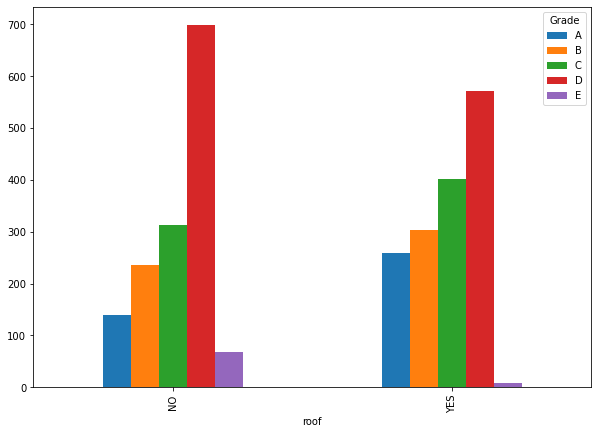

In [20]:
#two categorical data, so we use crosstab
pd.crosstab(h_grade_c['roof'], h_grade_c['Grade']).plot(kind ='bar', figsize=(10,7))
plt.show()

From the above, we obserave the following:
    
1. Grade D followed by Grade C are higest in demand with roof facility.

2. The house which are in grade D is higest in demand with or with-out roof facility

3. Grade A, B, E are is higest in demand with roof as compare to with-out roof facility

#### Analyze the Number of Rooms WRT to Grade

In [503]:
Df = h_grade.groupby(["Grade"])["Trooms"].count()

Text(0.5, 1.0, 'Total number of Rooms')

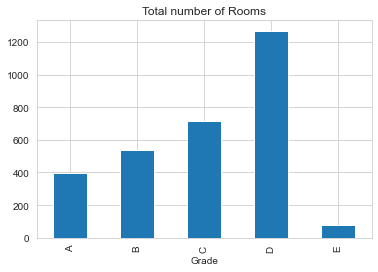

In [508]:
Df.plot(x="Grade", y = "Trooms", kind= "bar")
plt.title("Total number of Rooms")

The houses which having the highest numbers of rooms, are in Grade D.

#### What is the average price of the house?

In [506]:
Df1 = h_grade.groupby(["Grade"])["Expected price"].mean()

Grade
A    4456.583960
B    4247.224490
C    3887.370112
D    3360.353543
E    3031.289474
Name: Expected price, dtype: float64

Text(0.5, 1.0, 'Average price of house')

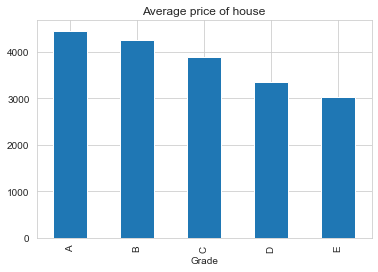

In [509]:
Df1.plot(x="Grade", y = "Expected price", kind= "bar")
plt.title("Average price of house")

##### Interpretation:
> 1. The highest average price of houses is in Grade A and B

> 2. The lowest average price of houses is in Grade D and E.

#### Which Grade of house has higest range of price?

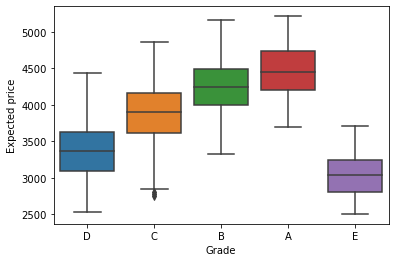

In [26]:
sns.boxplot(y = h_grade_c["Expected price"], x = h_grade_c['Grade'])
plt.show()

> ##### Interpretation: 
>> 1. Grade E has lowest range of price.
>> 2. Grade A and B has highest range of price.
>> 3. Grade D has medium range of price.
>> 4. There are some outliers present in expected price of Grade C. And the ouliers are present at the end of the lower limit of tail.


### Missing Value Assessment

In [510]:
h_grade_c.isnull().sum()

Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

> ##### Interpretation: 
>>There is no missing value exists in this dataset

### Feature Engineering

In [511]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
h_grade_c['roof']= label_encoder.fit_transform(h_grade_c['roof'])
 
h_grade_c['roof'].unique()

array([0, 1])

In [512]:
# Encode labels in column 'species'.
h_grade_c['Grade']= label_encoder.fit_transform(h_grade_c['Grade'])
 
h_grade_c['Grade'].unique()

array([3, 2, 1, 0, 4])

### Feature Scaling

In [35]:
# scaling the data using StandardScaler Scaling process

final_data =StandardScaler()
data_scaled = final_data.fit_transform(h_grade_c)

In [513]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_h_grade = h_grade_c.select_dtypes(include=numerics)
    
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_h_grade.to_numpy()),columns=new_h_grade.columns)
    
    return df_scaled

In [514]:
# scaling the data using MinMax Scaling process
scale = StandardScaler() #standard
h_grade_scaled=feature_scale(scale)
h_grade_scaled.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.677077,-0.718985,-0.014071,-0.299518,-0.005973,-1.029090,-1.004968,-1.321837,-1.241831,0.501655,1.488214,-0.532429,0.874159
1,1.603710,-1.422722,-0.625854,-0.882616,-1.125895,0.971733,0.451785,0.026334,-0.625028,0.103034,0.307560,-0.481292,0.874159
2,-0.054476,-0.015248,-0.014071,-0.299518,-0.565934,0.971733,1.067315,1.441914,0.608580,-0.352533,-0.282766,-0.061609,-0.025490
3,0.238145,-0.718985,-0.625854,-0.882616,-0.565934,0.971733,1.067315,-0.917385,-1.241831,-0.637262,-0.873093,-1.144319,0.874159
4,-0.249557,-0.015248,-0.625854,-0.299518,-0.565934,-1.029090,-1.004968,-1.389245,-0.625028,-1.719234,-1.463420,0.105911,0.874159


### Feature Selection

In [515]:
# Finding correlation between features
corr = h_grade_scaled.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.007983,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.099000


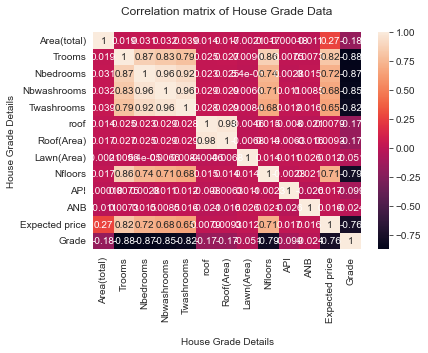

In [516]:
hm = sns.heatmap(h_grade_scaled.corr(), annot = True)
hm.set(xlabel='\nHouse Grade Details', ylabel='House Grade Details', title = "Correlation matrix of House Grade Data\n")
plt.show()

##### Interpretations:
 
    Trooms, Nbedrooms, Nbwashrooms, Twashrooms and Expected price has strong correlation with Grade feature.

#### So, we will use Trooms, Nbedrooms, Nbwashrooms, Twashrooms, Expected price and Grade in the analysis

In [517]:
new_h_grade = h_grade_c[['Trooms', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms','Nfloors', 'Expected price', 'Grade']]
new_h_grade.head()

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,Grade
0,6,5,4,6,2,3481,3
1,5,4,3,4,3,3510,3
2,7,5,4,5,5,3748,2
3,6,4,3,5,2,3134,3
4,7,4,4,5,3,3843,3


### Splitting Data and Train and Test the data

In [518]:
# Split the dataset into train and test sets

X = new_h_grade.drop("Grade", axis = 1)
y = new_h_grade["Grade"]

# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=20)  #trainset size 70% and test set size 30%

As our traget variable is in category form. So, We use Classification technique to build the model.

In [519]:
#store the predicted values of models wrt the model names
Output = []
Name = []

## Model 1: Logistic Regression

In [520]:
#define model
Log_Model = LogisticRegression()
Log_Model.fit(X_train, y_train)

LogisticRegression()

In [523]:
#predict the value

y_pred_testLog = Log_Model.predict(X_test)
print('Predicted value for test set:\n', y_pred_testLog,'\n')

#append the predicted value
Output.append(y_pred_testLog)
Name.append("Logistic Regression")

Predicted value for test set:
 [2 3 0 2 1 3 1 3 2 2 3 3 2 3 3 3 3 3 0 2 2 3 3 3 2 0 0 0 1 3 3 2 3 1 1 3 0
 3 0 1 0 3 1 3 1 1 0 2 3 3 2 3 3 1 3 3 2 3 3 1 2 3 3 3 3 1 3 3 2 1 2 3 0 2
 3 0 3 3 3 2 3 3 2 2 0 0 3 1 2 1 0 2 3 2 3 3 3 0 3 3 3 2 0 0 3 0 0 3 1 3 2
 3 0 1 3 3 3 3 3 0 1 1 3 0 3 3 3 0 1 3 3 3 3 3 2 2 0 2 3 0 3 2 2 0 3 2 3 3
 1 2 3 3 1 0 3 3 0 3 1 3 1 3 2 3 3 2 3 1 3 0 0 3 3 2 1 3 3 0 0 1 3 3 0 0 3
 3 1 0 3 2 3 1 0 3 1 3 3 3 3 1 2 2 0 2 2 2 0 3 1 3 1 1 3 3 3 0 2 1 3 1 3 2
 2 3 2 3 1 2 0 3 3 0 3 0 3 3 3 3 3 3 2 2 0 0 3 0 2 0 1 1 1 0 3 2 2 3 3 3 3
 2 3 0 3 3 2 2 2 2 3 1 3 2 3 3 0 2 2 0 2 0 0 3 0 3 3 3 3 3 3 3 0 3 2 1 3 0
 3 0 3 2 3 0 3 0 2 3 3 3 3 3 3 0 3 2 3 3 3 1 3 2 3 3 3 1 3 0 1 1 0 1 0 1 0
 1 0 0 0 3 3 3 1 3 3 3 1 3 3 2 0 1 1 3 2 0 3 2 3 3 1 2 1 3 2 0 2 2 3 3 3 1
 3 0 3 3 2 2 3 1 3 3 3 3 3 3 3 3 0 0 0 3 0 2 1 0 3 2 1 3 2 3 2 3 3 3 2 3 0
 2 1 2 3 1 3 0 2 1 1 3 3 0 3 2 2 1 2 2 3 1 0 3 3 1 3 1 3 1 0 2 2 0 2 2 3 3
 0 3 1 3 2 0 2 1 1 0 1 2 0 1 1 0 3 1 3 3 3 0 3 0 0 3 0 2 3 0 3 1 3 1 

### Model evaluation

In [524]:
#the accuracy of training and testing dataset
score_train = Log_Model.score(X_train,y_train)
score_test = Log_Model.score(X_test,y_test)

print("Evalate the model on the train data","%.2f"%score_train)
print("Evalate the model on the test data:", "%.2f"%score_test)

Evalate the model on the train data 0.58
Evalate the model on the test data: 0.60


In [525]:
#confustion matrix

confusion_matrix(y_test, y_pred_testLog)

array([[ 87,  25,  21,   0,   0],
       [ 41,  59,  42,  12,   0],
       [ 23,  41,  63,  82,   0],
       [  8,  19,  31, 327,   0],
       [  0,   0,   1,  18,   0]], dtype=int64)

In [526]:
#performance report
accuracy = accuracy_score(y_test, y_pred_testLog)
recall = recall_score(y_test, y_pred_testLog, pos_label=1, average='weighted')
precision = precision_score(y_test, y_pred_testLog, pos_label=1, average='weighted')
F1 = 2*precision*recall/precision+recall

print('Accuracy Score:', "%.2f"%accuracy)
print('Recall Score:',"%.2f"%recall)
print('Precision Score:',"%.2f"% precision)
print('F1-score Score:', "%.2f"%F1)

Accuracy Score: 0.60
Recall Score: 0.60
Precision Score: 0.56
F1-score Score: 1.79


## Model2: Decision Tree Classifier¶

In [527]:
# define model

DC_Model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, max_leaf_nodes=10)

# Train Decision Tree Classifer

DC_Model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10, min_samples_split=5)

In [531]:
#Predict the response for test dataset

test_pred_dc = DC_Model.predict(X_test)

#append the predicted value for test dataset
Output.append(test_pred_dc)
Name.append("Decision Tree")

#Predict the response for train dataset

train_pred_dc = DC_Model.predict(X_train)

print("Prediction value on test data set:\n" , test_pred_dc)

Prediction value on test data set:
 [2 3 1 1 1 3 1 3 3 1 3 1 2 2 3 3 3 2 3 2 1 3 3 2 1 2 0 2 2 3 3 1 3 1 2 3 1
 3 2 2 1 3 3 3 1 1 1 2 3 3 1 2 3 1 3 2 2 2 3 2 2 3 3 3 3 1 3 2 1 1 3 3 0 1
 3 0 3 2 3 1 2 3 0 1 1 0 2 1 1 2 1 1 3 1 2 3 2 1 3 3 3 2 2 0 3 2 0 2 1 3 1
 3 2 2 3 1 3 3 3 0 1 1 3 0 3 2 3 0 1 2 3 3 3 3 2 2 0 2 3 1 3 3 1 2 3 2 2 3
 1 1 2 3 2 2 3 3 0 3 1 3 1 3 0 3 3 1 3 1 3 1 0 3 3 2 1 2 3 1 0 1 3 3 0 2 2
 3 1 1 2 1 3 1 1 3 1 3 3 3 3 2 1 3 0 2 1 1 0 3 1 3 1 1 3 3 2 0 1 1 1 1 3 1
 2 3 2 3 2 2 0 3 3 3 2 0 3 3 3 3 3 2 3 3 0 3 1 0 2 1 1 1 1 1 3 2 1 3 3 2 3
 3 3 0 3 3 2 1 3 1 3 1 3 1 3 3 1 1 1 0 1 1 1 3 1 3 2 3 3 2 3 3 1 3 2 1 3 1
 3 0 1 3 3 1 3 1 2 2 3 3 3 3 3 2 3 2 2 3 3 1 3 1 3 2 3 3 3 0 1 2 0 1 0 2 0
 2 2 1 2 3 2 1 2 3 3 2 1 3 3 1 0 1 2 3 2 1 3 1 3 3 1 3 0 3 1 0 0 2 3 3 3 1
 3 0 3 2 1 1 3 1 3 3 3 3 3 3 3 2 1 1 3 3 0 1 2 2 3 1 2 2 3 3 0 3 3 3 3 2 0
 2 1 1 3 1 3 0 1 1 1 3 3 1 3 2 2 1 1 2 2 1 0 3 2 3 3 0 3 1 1 2 3 0 0 1 3 3
 1 3 2 3 2 0 1 1 1 1 1 3 1 2 1 0 3 1 2 3 2 1 3 1 1 3 0 2 3 1 3 1

### Model Evaluation

In [532]:
# Model Accuracy for test data
print("Accuracy for test data:{:.2f}".format(metrics.accuracy_score(y_test, test_pred_dc)))

# Model Accuracy for train data
print("Accuracy for train data:{:.2f}".format(metrics.accuracy_score(y_train, train_pred_dc)))

Accuracy for test data:0.74
Accuracy for train data:0.74


In [533]:
#confustion matrix of DC

confusion_matrix(y_test, test_pred_dc)

array([[ 75,  58,   0,   0,   0],
       [  2, 134,  18,   0,   0],
       [  0,  48, 136,  25,   0],
       [  0,   0,  65, 320,   0],
       [  0,   0,   0,  19,   0]], dtype=int64)

In [534]:
#model performance
accuracy_dc = accuracy_score(y_test, test_pred_dc)
recall_dc =   recall_score(y_test, test_pred_dc, pos_label=1, average='weighted')
precision_dc = precision_score(y_test, test_pred_dc, pos_label=1, average='weighted')
F1_dc = 2*precision_dc*recall_dc/precision_dc+recall_dc

print("Accuracy Score:{:.2f}".format(accuracy_dc))
print("recall Score:'{:.2f}".format(recall_dc))
print("precision Score:{:.2f}".format(precision_dc))
print("F1 Score:{:.2f}".format(F1_dc))

Accuracy Score:0.74
recall Score:'0.74
precision Score:0.76
F1 Score:2.22


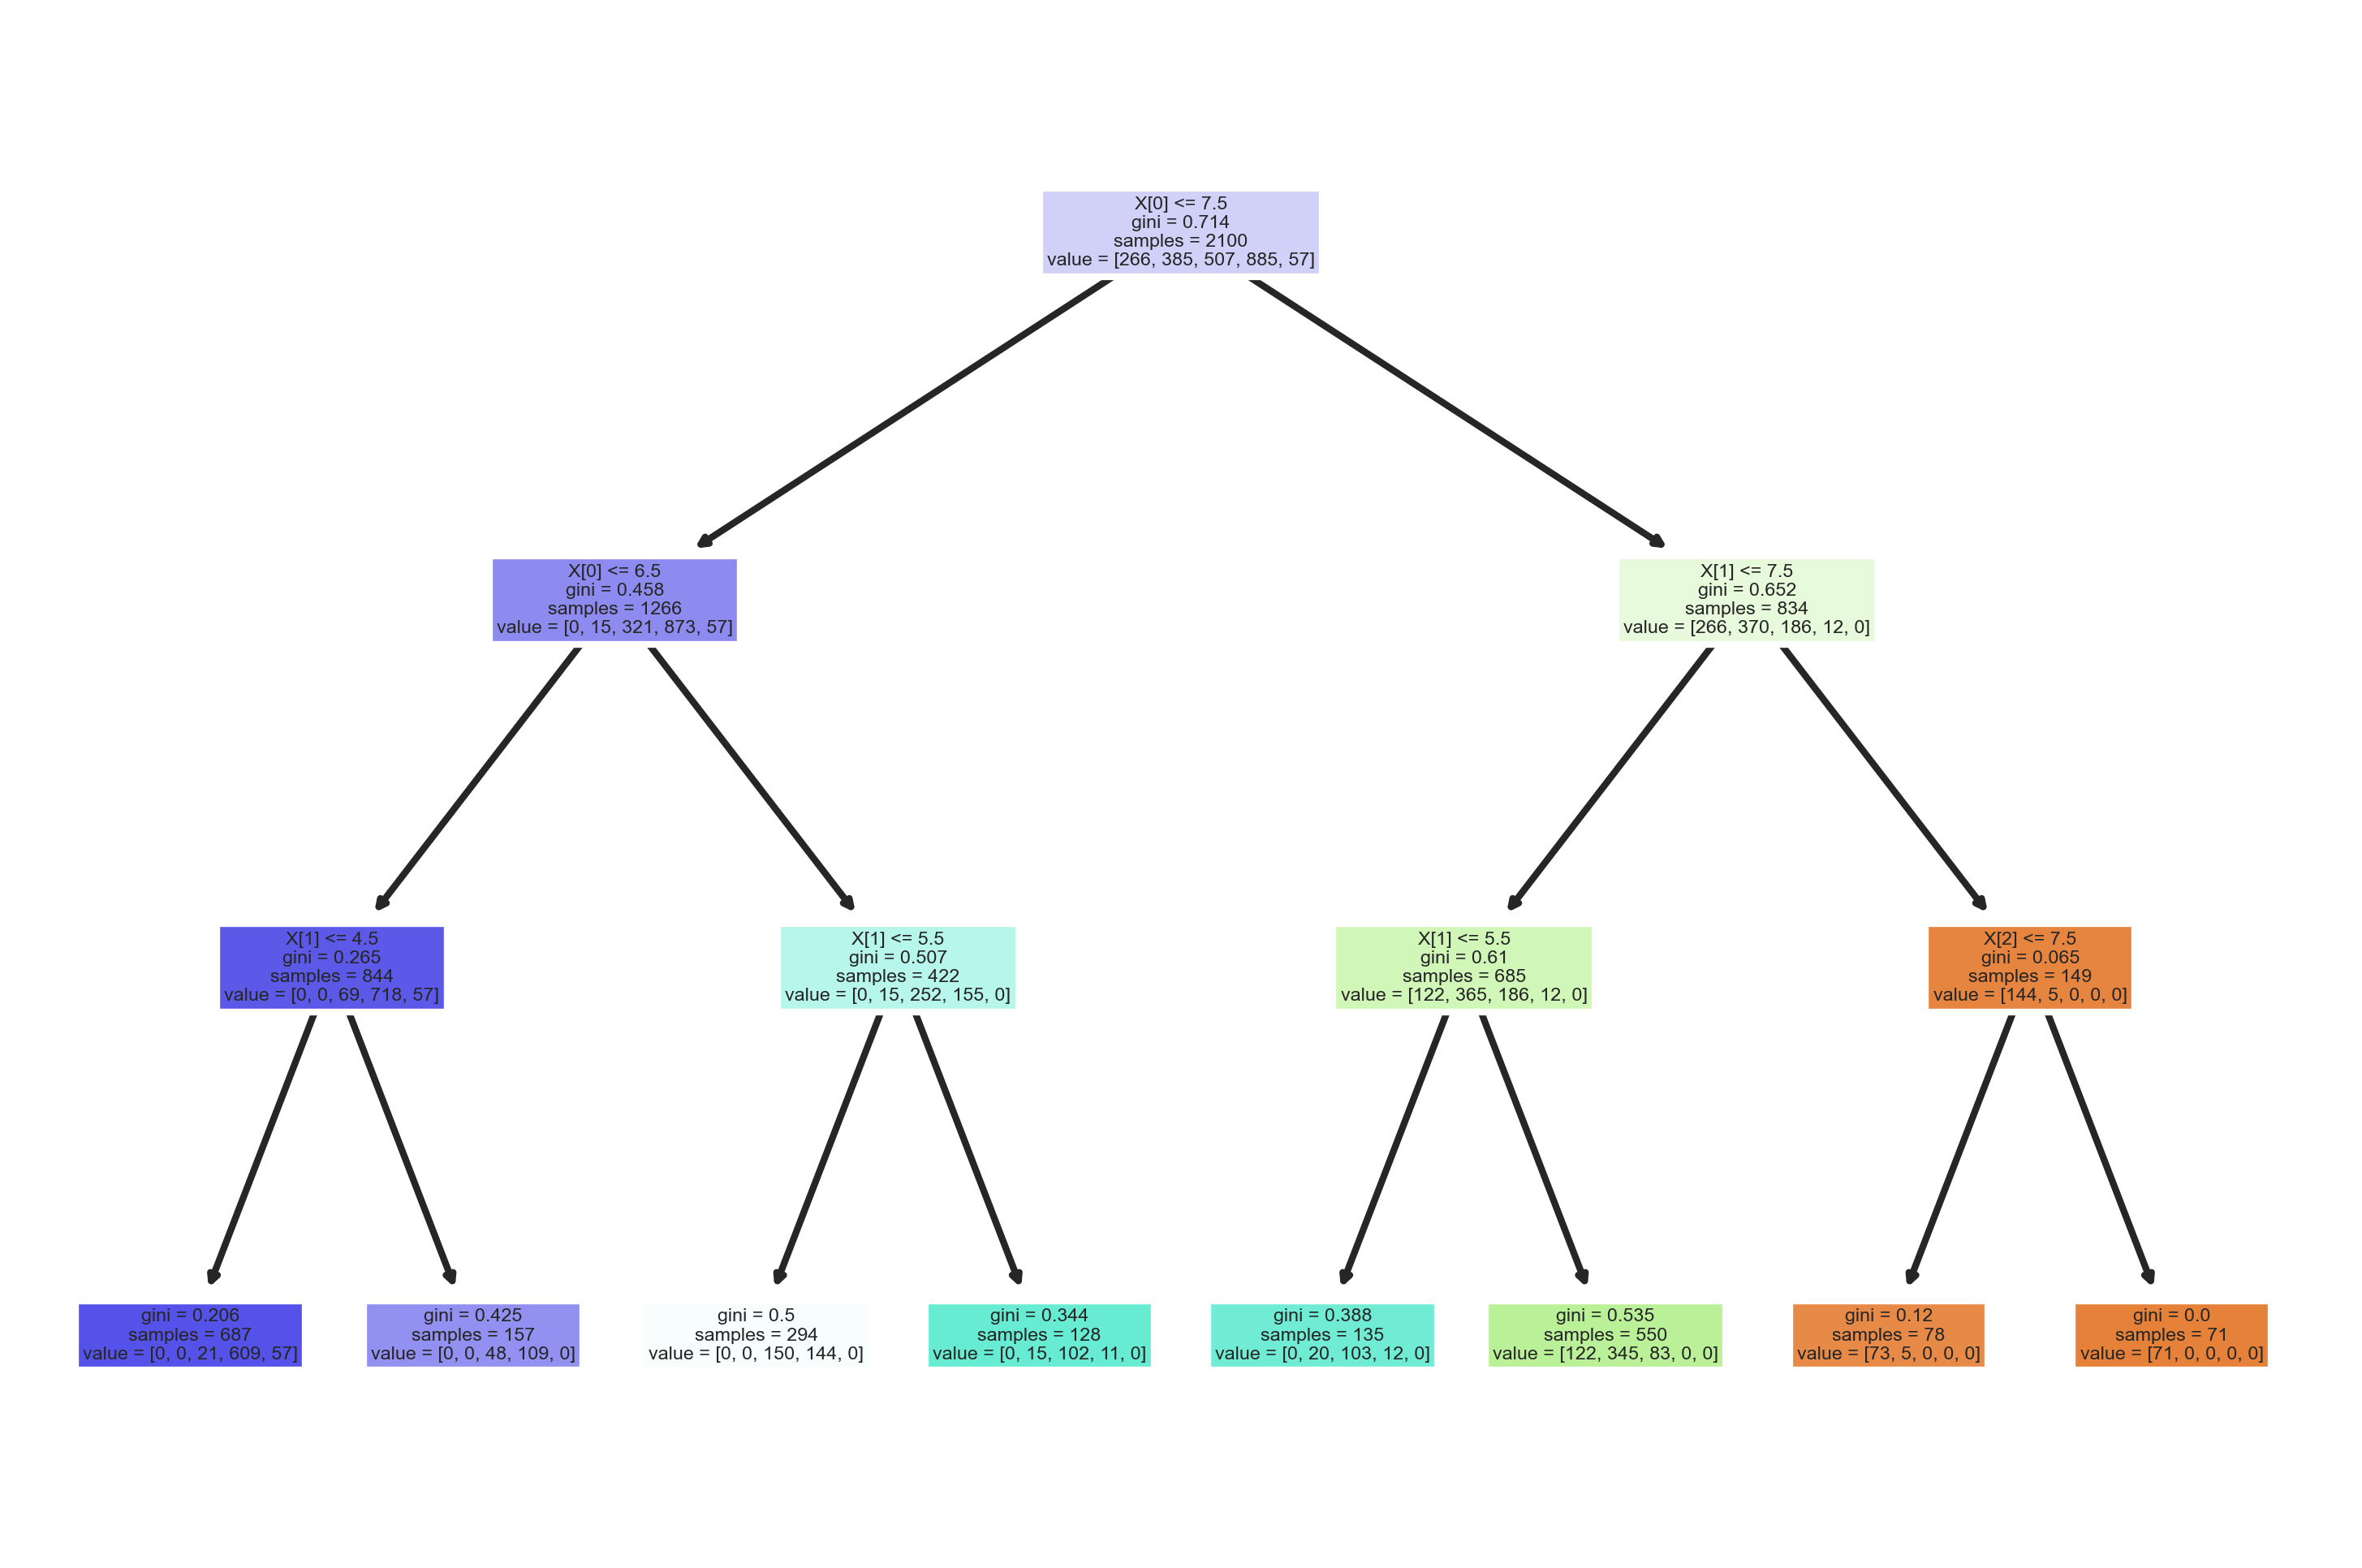

In [537]:
#Visualition of house grade data
from sklearn import tree

fig, axes = plt.subplots(dpi=600)
tree.plot_tree(DC_Model, filled = True);

#save figure in current directory as png
fig.savefig('House_Grade_classification_decisiontree.png')

## Model 3: GaussianNB naive bayes classifier

In [538]:
#Build tha model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [539]:
# Predicting the Test set results  
test_pred_nb = NB_model.predict(X_test)

print("Predication probabilities on the test data: \n",test_pred_nb)

#append the predicted value for test dataset
Output.append(test_pred_nb)
Name.append("GaussianNB")


#Predicting the Train set results
train_pred_nb = NB_model.predict(X_train)
print("\nPredication probabilities on the train data: \n",train_pred_nb)

Predication probabilities on the test data: 
 [2 3 1 0 0 3 1 3 3 1 3 1 2 2 3 3 3 3 3 2 0 3 3 2 1 2 0 2 2 4 3 1 3 1 2 3 1
 3 2 2 0 4 3 4 1 1 1 2 3 3 1 2 3 1 4 3 1 2 4 2 2 3 4 4 3 1 4 3 1 1 2 4 0 1
 2 0 4 2 4 1 2 3 0 1 1 0 2 1 1 2 1 0 4 1 2 3 2 0 3 3 3 2 2 0 4 2 0 2 1 2 1
 3 2 2 4 2 3 3 3 0 0 1 3 0 3 2 3 0 1 3 3 3 3 4 1 2 0 2 3 1 3 3 1 2 4 2 2 4
 1 1 2 4 2 2 4 3 0 3 1 4 1 4 0 3 2 0 3 1 3 1 0 3 4 2 1 2 3 0 0 1 3 4 0 2 3
 3 1 0 2 1 3 0 1 3 0 4 4 3 3 2 1 3 0 2 1 1 0 3 2 3 2 0 4 3 3 0 2 1 1 1 4 2
 2 3 2 3 2 2 0 3 3 2 2 0 3 3 4 4 3 3 3 2 0 3 1 0 2 1 1 1 1 0 3 2 1 3 3 3 4
 2 3 0 3 4 2 1 3 2 4 0 4 0 3 3 1 1 1 0 1 1 1 3 1 3 2 4 2 3 3 4 1 4 2 1 3 0
 3 0 1 3 2 0 4 1 3 3 3 4 3 3 3 2 3 2 2 3 3 1 3 1 4 2 2 3 3 0 1 2 0 1 0 2 0
 1 2 0 2 4 2 1 2 3 3 2 1 3 4 1 0 1 2 3 2 0 3 2 3 3 1 3 0 4 1 0 0 2 3 4 3 1
 3 0 3 3 1 1 3 1 3 3 3 3 4 4 3 2 1 0 2 3 0 1 3 1 4 1 3 2 3 3 0 3 3 4 3 2 0
 1 1 1 4 1 4 0 1 0 0 3 4 0 3 2 2 1 1 2 2 0 0 3 2 3 4 0 3 1 1 2 3 0 0 0 3 3
 1 3 2 4 2 0 1 1 1 1 0 3 0 2 0 0 3 1 2 3 2 0 3 1 1 3 0

### Model Evaluation

In [540]:
# Model Accuracy for test data
print("Accuracy for test data:{:.2f}".format(accuracy_score(y_test, test_pred_nb)))

# Model Accuracy for train data
print("Accuracy for train data:{:.2f}".format(metrics.accuracy_score(y_train, train_pred_nb)))

Accuracy for test data:0.72
Accuracy for train data:0.74


In [541]:
#confustion matrix NB

confusion_matrix(y_test, test_pred_nb)

array([[114,  19,   0,   0,   0],
       [ 17, 120,  17,   0,   0],
       [  0,  42, 144,  23,   0],
       [  0,   0,  51, 257,  77],
       [  0,   0,   0,   3,  16]], dtype=int64)

In [322]:
# model performance
accuracy_nb = accuracy_score(y_test, test_pred_nb)
recall_nb =   recall_score(y_test, test_pred_nb,pos_label=1, average='weighted')
precision_nb = precision_score(y_test, test_pred_nb,pos_label=1, average='weighted')

F1_nb = 2*precision_nb*recall_nb/precision_nb+recall_nb

print("Accuracy Score:{:.2f}".format(accuracy_nb))
print("Recall value:{:.2f}".format(recall_nb))
print("Precision Score:{:.2f}".format(precision_nb))
print("F1 Score:{:.2f}".format(F1_nb))

Accuracy Score:0.72
Recall value:0.72
Precision Score:0.79
F1 Score:2.17


## Model 4: KNeighborsClassifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [542]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

knn_clf.fit(X_train,y_train)

ypred = knn_clf.predict(X_test) 

#append the predicted value for test dataset
Output.append(ypred)
Name.append("KNeighborsClassifier")

In [543]:
cv_scores = cross_val_score(knn_clf, X, y, cv=3)

In [544]:
#print each cv score (accuracy) and average of cv_scores
print("cv_scores: ", cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

cv_scores:  [0.642 0.611 0.625]
cv_scores mean:0.626


In [545]:
#confustion matrix KNeighborsClassifier

confusion_matrix(y_test, ypred)

array([[ 74,  50,   9,   0,   0],
       [ 54,  65,  31,   4,   0],
       [ 12,  50,  89,  58,   0],
       [  0,   2,  52, 328,   3],
       [  0,   0,   0,  17,   2]], dtype=int64)

In [546]:
# model performance
accuracy_kn = accuracy_score(y_test, ypred)
recall_kn =   recall_score(y_test, ypred,pos_label=1, average='weighted')
precision_kn = precision_score(y_test, ypred,pos_label=1, average='weighted')

F1_kn = 2*precision_nb*recall_nb/precision_nb+recall_nb

print("Accuracy Score:{:.2f}".format(accuracy_kn))
print("Recall value:{:.2f}".format(recall_kn))
print("Precision Score:{:.2f}".format(precision_kn))
print("F1 Score:{:.2f}".format(F1_kn))

Accuracy Score:0.62
Recall value:0.62
Precision Score:0.61
F1 Score:2.17


## Model 5: Random Forest using GridSearchCV

In [547]:
from sklearn.ensemble import RandomForestClassifier

In [548]:
from sklearn.model_selection import GridSearchCV

In [549]:
## Create a based model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [550]:
params ={
    "max_depth":[2,3,5,10,20],
    "min_samples_leaf":[5,10,20,50,100,200],
    "n_estimators":[10,25,30,50,100,200]
}

In [551]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring="accuracy")

In [552]:
## Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [553]:
#gridsearchCV best score
grid_search.best_score_

0.7995238095238095

In [554]:
# best Hyperparameters for Random Forest 
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [ ]:
#Rebuild the model with best estimators

In [414]:
#craete random forest model
rf_1 = RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=30,
                       n_jobs=-1, random_state=42, oob_score=True)

In [415]:
#fit the model
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=30,
                       n_jobs=-1, oob_score=True, random_state=42)

In [555]:
#prediction on the test data
ypred_rf_1 = rf_1.predict(X_test) 

#append the predicted value for test dataset
Output.append(ypred_rf_1)
Name.append("Random Forest")

### Model Evaluation

In [556]:
# Model Accuracy for test data
print("Accuracy for test data:{:.2f}".format(accuracy_score(y_test, ypred_rf_1)))

Accuracy for test data:0.80


In [557]:
#confustion matrix random forest

confusion_matrix(y_test, ypred_rf_1)

array([[103,  30,   0,   0,   0],
       [  9, 123,  22,   0,   0],
       [  0,  30, 142,  37,   0],
       [  0,   0,  30, 355,   0],
       [  0,   0,   0,  19,   0]], dtype=int64)

In [558]:
# model performance
accuracy_r = accuracy_score(y_test, ypred_rf_1)
recall_r =   recall_score(y_test, ypred_rf_1,pos_label=1, average='weighted')
precision_r = precision_score(y_test, ypred_rf_1,pos_label=1, average='weighted')

F1_r = 2*precision_nb*recall_nb/precision_nb+recall_nb

print("Accuracy Score:{:.2f}".format(accuracy_r))
print("Recall value:{:.2f}".format(recall_r))
print("Precision Score:{:.2f}".format(precision_r))
print("F1 Score:{:.2f}".format(F1_r))

Accuracy Score:0.80
Recall value:0.80
Precision Score:0.79
F1 Score:2.17


In [454]:
# checking the oob score
print("Out of bag (OOB) score for Random forest model: {:.2f}".format(rf_1.oob_score_))

Out of bag (OOB) score for Random forest model: 0.79


OOB score is also good and it validating the Random forest model.

#### feature importance

In [559]:
#find out the feature importance
rf_best.feature_importances_

array([0.36680843, 0.22772915, 0.17444372, 0.07524945, 0.07243019,
       0.08333907])

In [560]:
#craete a dataframe
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "importance": rf_best.feature_importances_
})

In [561]:
#sort the data to find out the top 3 importance features
imp_df.sort_values(by="importance", ascending=False)

,Features,importance
0,Trooms,0.366808
1,Nbedrooms,0.227729
2,Nbwashrooms,0.174444
5,Expected price,0.083339
3,Twashrooms,0.075249
4,Nfloors,0.072430


Number of rooms in the house, Number of bedrooms in the house and Number of attached washrooms with bedroom are the top three features of dataset

# Model Comparison

###### We have used following models:

 >Logistic Regression :
>>> Accuracy Score: 0.60, Recall Score: 0.60, Precision Score: 0.56, F1-score Score: 1.79
 
 >Decision Tree : Accuracy Score is 0.74
 >>> Accuracy Score:0.74, recall Score:'0.74, precision Score:0.76, F1 Score:2.22
 
 >GaussianNB : Accuracy Score is 0.72
 >>> Accuracy Score:0.72, Recall value:0.72, Precision Score:0.79, F1 Score:2.17
 
 >KNeighborsClassifier : Accuracy Score is 0.62
 >>> Accuracy Score:0.62, Recall value:0.62, Precision Score:0.61, F1 Score:2.17
 
 >Random Forest : Accuracy Score is 0.80
 >>> Accuracy Score:0.80, Recall value:0.80, Precision Score:0.79, F1 Score:2.17


###### Accuracy score of Random forest model is highest.

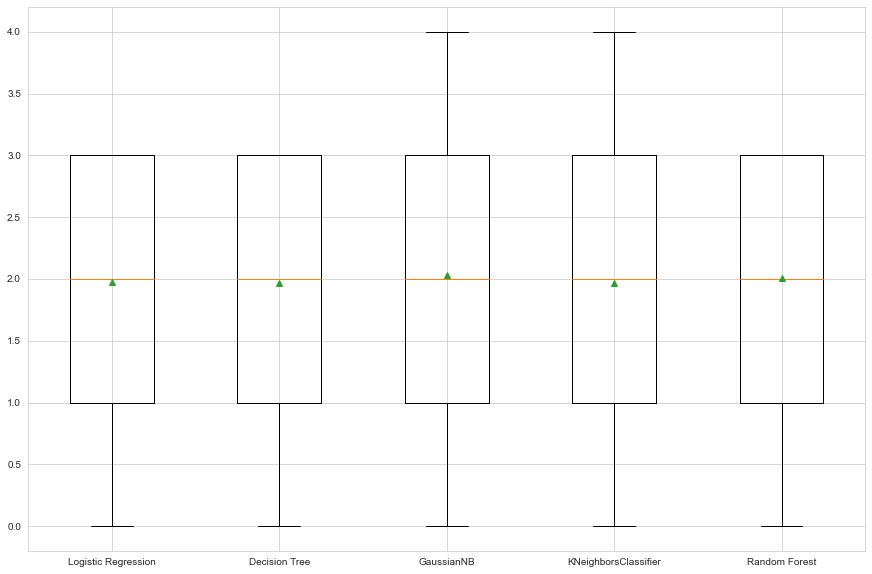

In [564]:
# plot model predicted values for comparison
plt.figure(figsize=(15, 10))
pyplot.boxplot(Output, labels = Name, showmeans = True )
pyplot.show()

##### Interpretations:

1. GaussianNB's distributions slightly right skwed as the mean is greater than median.

2. Logistic Regression, Decision Tree, and KNeighborsClassifier models are left skwed as the mean is less than median.

3. Random Forest has normal distribution as mean and median are equal.

###### From the above five models, Randam Forest model is best as we can see the model accuracy score  is about 80% and recall value is 80%, Precision score is 79%, which is a highest from other four models.

As we can see in the above boxplot, the predicted values of Random Forest model are normal distributed.

Hence, this model is good to use for Business obejective